# Import Libraries

Import library-library yang dibutuhkan untuk komputasi, visualisasi, dan struktur data.

In [107]:
%pip install pandas matplotlib seaborn scikit-learn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [108]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Data Loading

Load dataset ke dalam dataframe.

In [109]:
df = pd.read_csv('./datasets/bank/bank.csv', sep=';')
df.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


# Data Exploration - 1

Tetapkan kolom target (kolom yang diprediksi) dan kolom feature (kolom untuk memprediksi) yang akan digunakan untuk modelling.

In [110]:
target_col = 'y'
feature_cols = df.drop(target_col, axis=1).columns

print('Target Column:', target_col)
print('Feature Columns:', ', '.join(feature_cols))

Target Column: y
Feature Columns: age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome


Cek jumlah baris dan kolom padaset.

In [111]:
df.shape

(4521, 17)

Diketahui terdapat 4521 baris dan 17 kolom pada dataset.

Cek nilai kosong/*missing values* pada dataset.

In [112]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Diketahui tidak ada *missing values* pada dataset sehingga tidak perlu dilakukan penghapusan data yang bernilai kosong.

Cek informasi dari kolom-kolom dataset.

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


Cek nilai-nilai data dan jumlahnya pada masing-masing kolom dataset dengan bar plot.

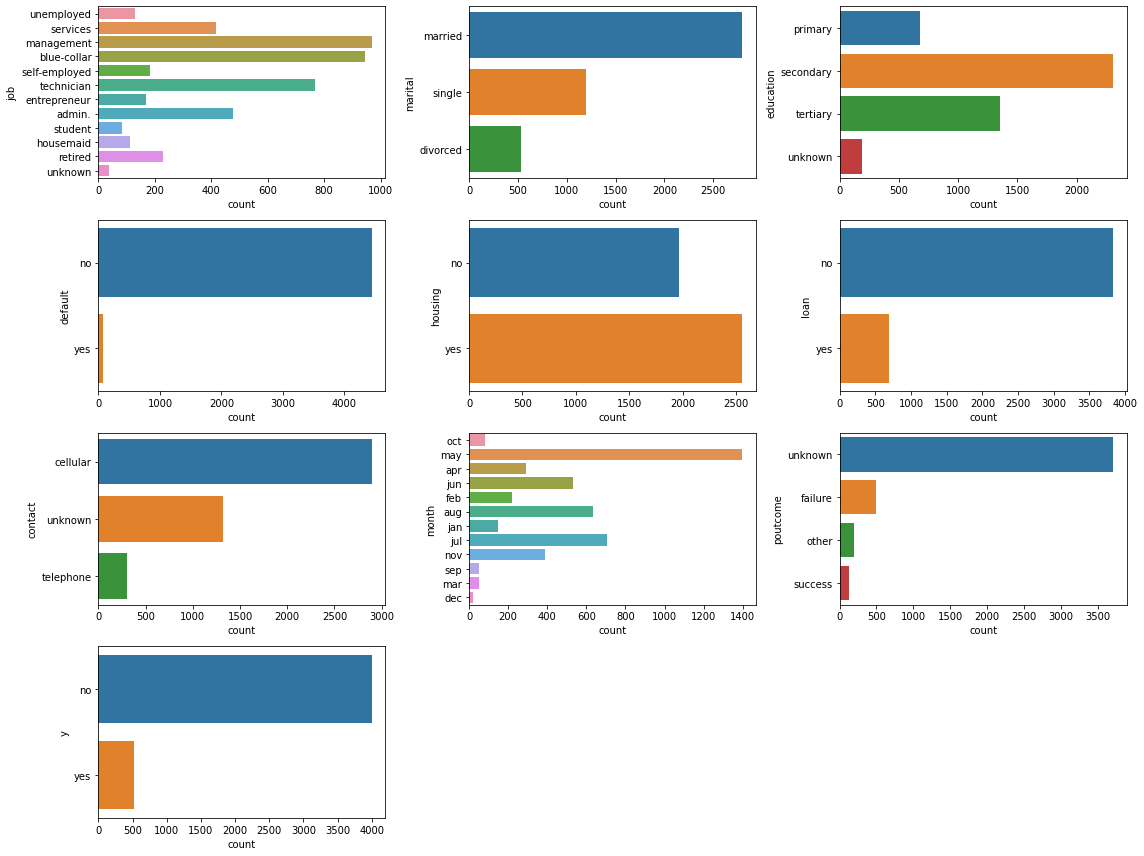

In [114]:
categorical_cols = df.select_dtypes(include='object').columns

def plot_categorical_cols(categorical_cols):
  plt.figure(figsize=(16, 12))
  for i, col in enumerate(categorical_cols, 1):
    plt.subplot(math.ceil(len(categorical_cols)/3), 3, i)
    sns.countplot(df, y=col)
    plt.tight_layout()
  plt.show()
  
plot_categorical_cols(categorical_cols)

# Data Cleaning - 1

Hapus data bernilai ambigu ("unknown") pada kolom **job** dan **education**. Dan hapus kolom **contact** dan **poutcome** karena memiliki banyak data bernilai ambigu.

In [115]:
df = df.drop(df[df['job'] == 'unknown'].index)
df = df.drop(df[df['education'] == 'unknown'].index)
df = df.drop(['contact', 'poutcome'], axis=1)

# Data Preprocessing - 1

Ubah nilai data "yes" dan "no" menjadi biner.

In [116]:
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
df['y'] = df['y'].map({'yes': 1, 'no': 0})

Ubah nilai data pada kolom **month** menjadi angka.

In [117]:
months = ('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec')

for d in [df]:
  for i, month in enumerate(months, 1):
    d.loc[d['month'] == month, 'month'] = i
  
df['month'] = pd.to_numeric(df['month'])

Cek kembali nilai-nilai data dan jumlahnya pada masing-masing kolom dataset setelah dilakukan beberapa perubahan.

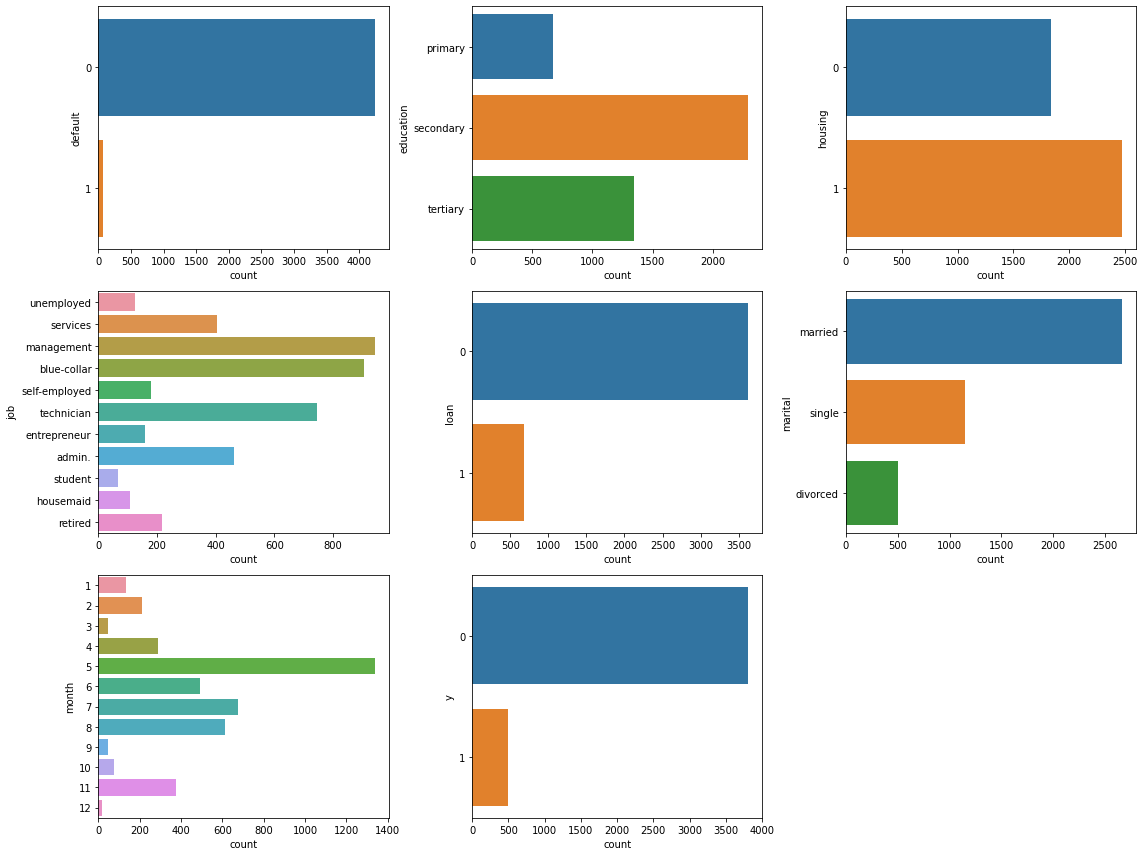

In [118]:
plot_categorical_cols(np.setdiff1d(categorical_cols, ['contact', 'poutcome']))

# Data Exploration - 2

Cek statistik deskriptif dari dataset.

In [119]:
df.describe()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
count,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000
mean,40.970309,0.016933,1410.662723,0.574113,0.158432,15.908142,6.173510,264.833449,2.805382,39.741591,0.544885,0.115518
std,10.500185,0.129037,3015.650889,0.494534,0.365188,8.205590,2.372024,260.940391,3.134040,100.048485,1.705530,0.319684
min,19.000000,0.000000,-3313.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,66.500000,0.000000,0.000000,9.000000,5.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,440.000000,1.000000,0.000000,16.000000,6.000000,187.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1456.000000,1.000000,0.000000,21.000000,8.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
max,87.000000,1.000000,71188.000000,1.000000,1.000000,31.000000,12.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


Cek outlier pada dataset dengan box plot.

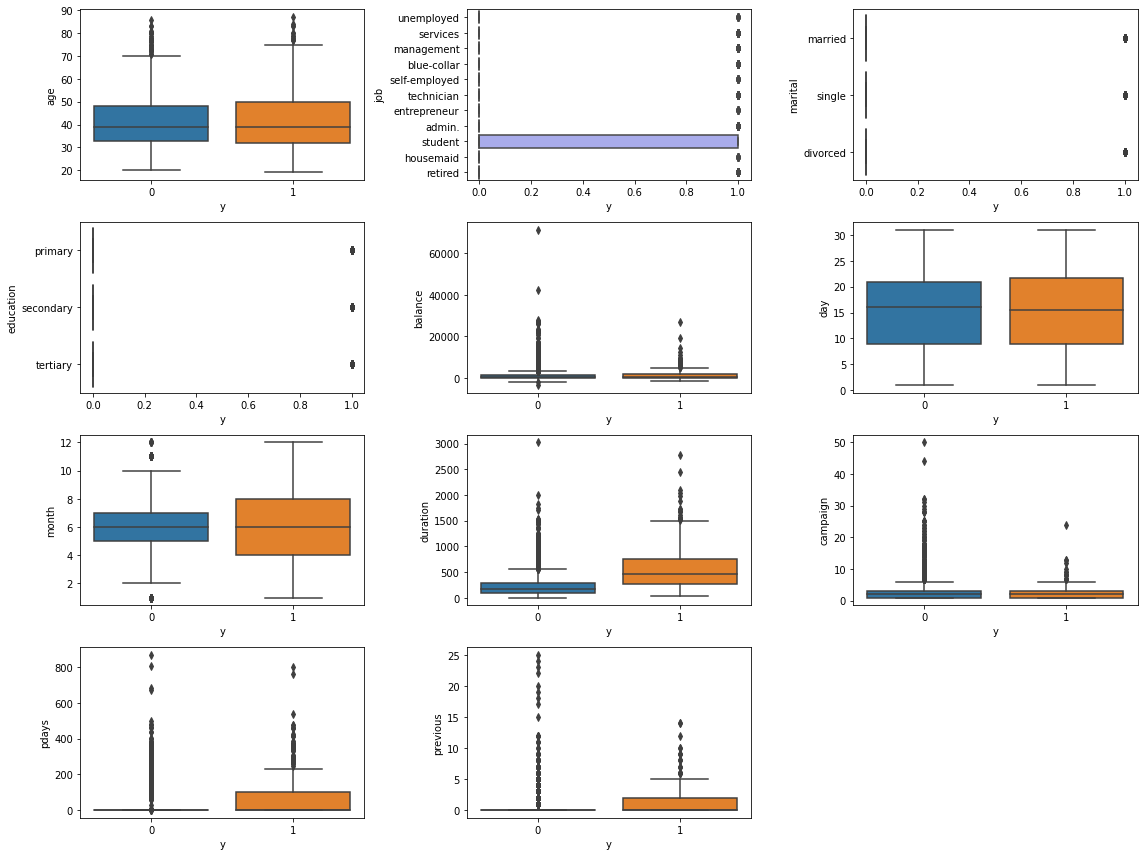

In [120]:
non_binary_cols = df.drop(df.columns[df.isin((0,1)).all()], axis=1).columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(non_binary_cols, 1):
  plt.subplot(math.ceil(len(non_binary_cols)/3), 3, i)
  sns.boxplot(df, y=col, x=target_col)
  plt.tight_layout()
plt.show()

Diketahui beberapa kolom seperti **age**, **balance**, **duration**, **campaign**, **pdays**, dan **previous** memiliki outlier, akan tetapi outlier tersebut tidak perlu dihapus mengingat dibutuhkannya data yang besar untuk mendapatkan performa model yang baik.

Cek distribusi data pada dataset dengan histogram.

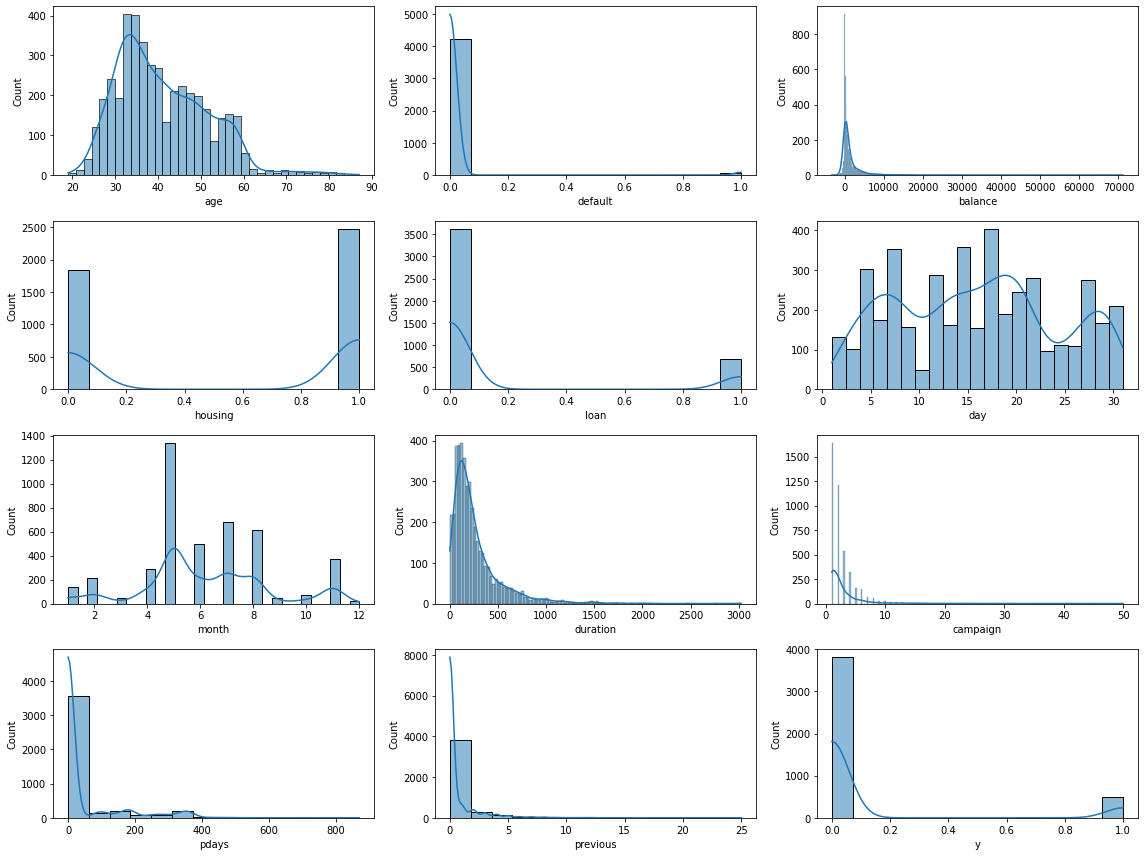

In [121]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
  plt.subplot(math.ceil(len(numerical_cols)/3), 3, i)
  sns.histplot(df, x=col, kde=True)
  plt.tight_layout()
plt.show()

Diketahui beberapa kolom seperti **balance**, **duration**, **pdays**, dan **previous** memiliki distribusi data yang miring/*skew* secara signifikan.

# Data Exploration - 3

Cek korelasi data antara kolom feature dan kolom target (**y**) dengan heatmap.

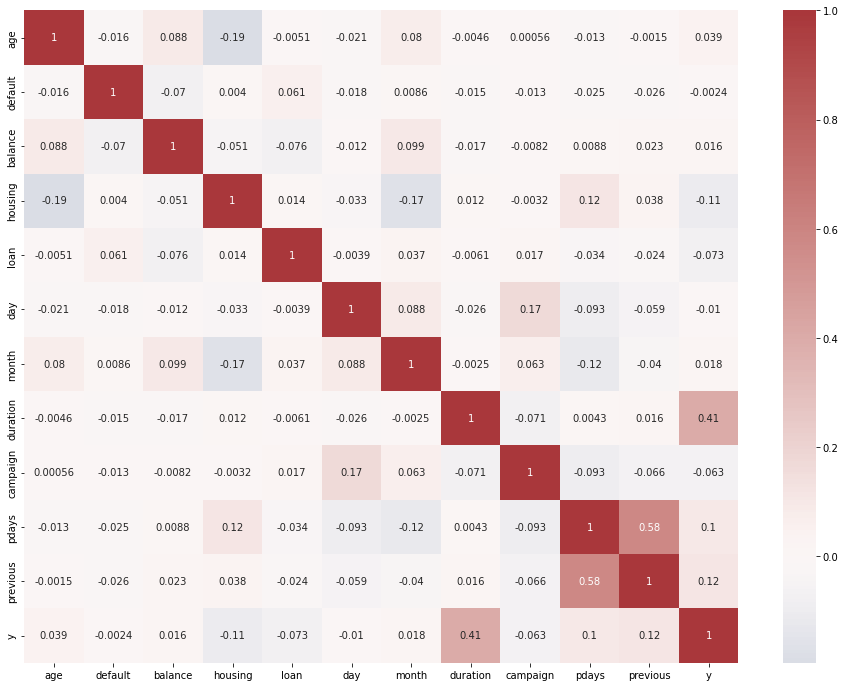

In [122]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='vlag',  center=0)
plt.show()

# Data Preprocessing - 2

Tetapkan kolom kategorikal yang di-encode datanya.

In [123]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['job', 'marital', 'education'], dtype='object')

Encode data pada kolom kategorikal.

In [124]:
encoder = OneHotEncoder()
encoded_categorical_df = pd.DataFrame(encoder.fit_transform(df[categorical_cols]).toarray(), 
                                      columns=encoder.get_feature_names_out())
encoded_categorical_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Gabungkan dataset dari data kategorikal yang telah ter-encode dengan dataset yang asli.

In [125]:
df = df.reset_index().join(encoded_categorical_df).drop(categorical_cols, axis=1)
df.head()

,index,age,default,balance,housing,loan,day,month,duration,campaign,...,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
0,0,30,0,1787,0,0,19,10,79,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1,33,0,4789,1,1,11,5,220,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2,35,0,1350,1,0,16,4,185,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,3,30,0,1476,1,1,3,6,199,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,59,0,0,1,0,5,5,226,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Tetapkan kembali kolom feature berdasarkan dataset yang baru.

In [126]:
feature_cols = df.drop(target_col, axis=1).columns
feature_cols

Index(['index', 'age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary'],
      dtype='object')

Pisahkan dataset menjadi dataset target dan dataset feature.

In [127]:
X = df[feature_cols]
y = df[target_col]

Lakukan *standardization* untuk dataset *feature*.

In [128]:
X_cols = list(X.columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X_cols)

X_scaled.describe()

,index,age,default,balance,housing,loan,day,month,duration,campaign,...,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
count,4.311000e+03,4.311000e+03,4.311000e+03,4.311000e+03,4.311000e+03,4.311000e+03,4.311000e+03,4.311000e+03,4.311000e+03,4.311000e+03,...,4.311000e+03,4.311000e+03,4.311000e+03,4.311000e+03,4.311000e+03,4.311000e+03,4.311000e+03,4.311000e+03,4.311000e+03,4.311000e+03
mean,1.582280e-16,2.851401e-16,-1.648209e-18,2.884365e-17,1.104300e-16,-4.285342e-17,-9.065147e-17,-5.439088e-17,4.532574e-17,-6.922476e-17,...,2.966776e-17,-5.356678e-17,1.895440e-17,-1.091938e-17,-9.889252e-18,1.038371e-16,-1.648209e-17,4.367753e-17,-7.087297e-17,1.137264e-16
std,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,...,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00
min,-1.730814e+00,-2.092616e+00,-1.312445e-01,-1.566564e+00,-1.161051e+00,-4.338871e-01,-1.817038e+00,-2.181305e+00,-9.997061e-01,-5.761225e-01,...,-3.215652e-01,-1.265954e-01,-4.574458e-01,-1.735152e-01,-3.634423e-01,-1.271804e+00,-6.010201e-01,-4.293491e-01,-1.068447e+00,-6.723125e-01
25%,-8.687023e-01,-7.591517e-01,-1.312445e-01,-4.457806e-01,-1.161051e+00,-4.338871e-01,-8.419801e-01,-4.947865e-01,-6.164324e-01,-5.761225e-01,...,-3.215652e-01,-1.265954e-01,-4.574458e-01,-1.735152e-01,-3.634423e-01,-1.271804e+00,-6.010201e-01,-4.293491e-01,-1.068447e+00,-6.723125e-01
50%,3.031231e-04,-1.876669e-01,-1.312445e-01,-3.219124e-01,8.612887e-01,-4.338871e-01,1.119587e-02,-7.315682e-02,-2.983152e-01,-2.570085e-01,...,-3.215652e-01,-1.265954e-01,-4.574458e-01,-1.735152e-01,-3.634423e-01,7.862845e-01,-6.010201e-01,-4.293491e-01,9.359376e-01,-6.723125e-01
75%,8.654786e-01,6.695603e-01,-1.312445e-01,1.503574e-02,8.612887e-01,-4.338871e-01,6.206073e-01,7.701026e-01,2.459335e-01,6.210546e-02,...,-3.215652e-01,-1.265954e-01,-4.574458e-01,-1.735152e-01,-3.634423e-01,7.862845e-01,1.663838e+00,-4.293491e-01,9.359376e-01,1.487404e+00
max,1.731420e+00,4.384212e+00,7.619370e+00,2.314108e+01,8.612887e-01,2.304747e+00,1.839430e+00,2.456622e+00,1.057899e+01,1.506046e+01,...,3.109790e+00,7.899181e+00,2.186051e+00,5.763184e+00,2.751468e+00,7.862845e-01,1.663838e+00,2.329107e+00,9.359376e-01,1.487404e+00


Cek dataset feature yang telah ter-standardized dengan box plot.

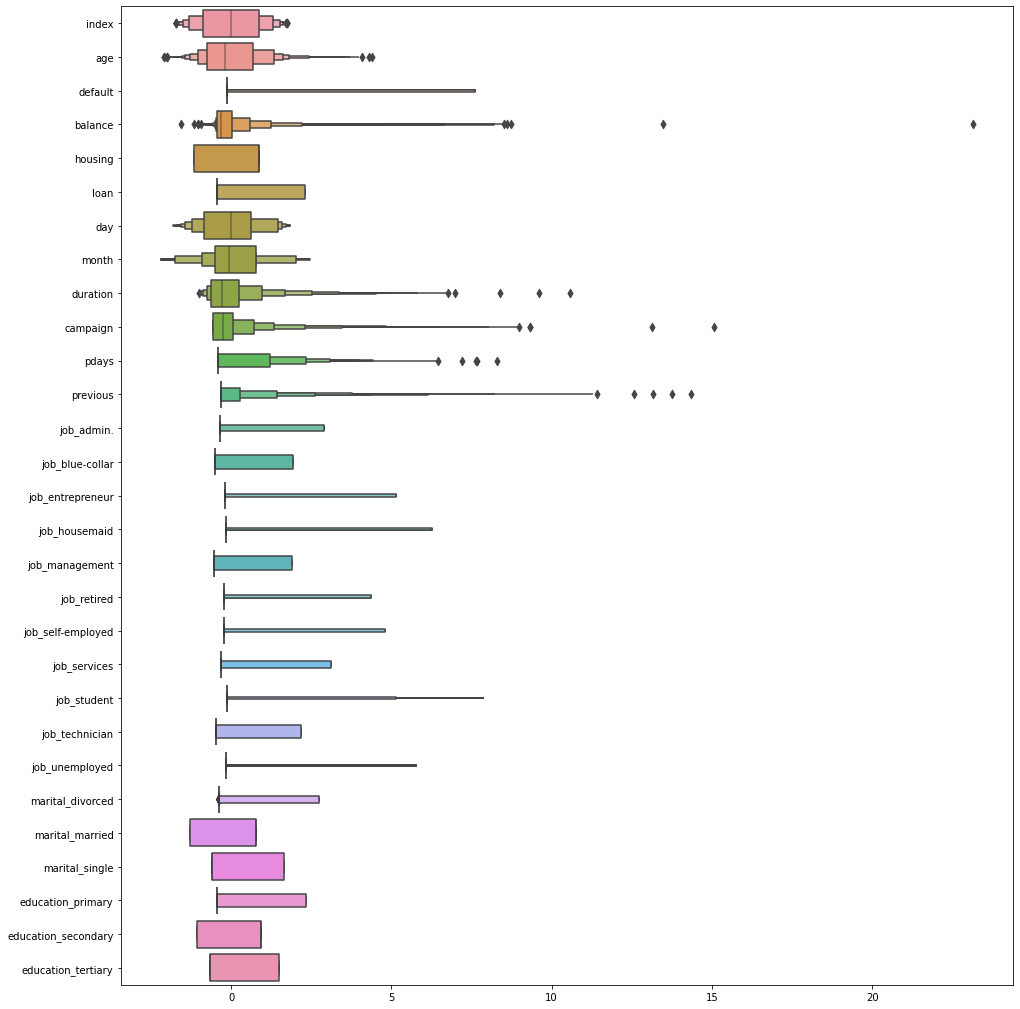

In [129]:
plt.figure(figsize=(16,18))
sns.boxenplot(X_scaled, orient='h')
plt.show()

Pisahkan kembali dataset target dan dataset feature menjadi dataset target untuk training (**X_train**), dataset target untuk testing (**X_test**), dataset feature untuk training (**y_train**), dan dataset feature untuk testing (**y_test**).

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=25)

# Modelling

Buat function untuk menampilkan plot confusion matrix.

In [131]:
def plot_confusion_matrix(y_test, y_pred, ticks):
  cf_matrix = confusion_matrix(y_test, y_pred)
  
  plt.figure(figsize=(8,6))
  sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='flare', center=0)
  plt.xticks(np.array(range(2))+0.5, ticks)
  plt.yticks(np.array(range(2))+0.5, ticks)
  plt.show()

## Logistic Regression

Lakukan training untuk model Logistik Regression dengan dataset **X_train** dan **y_train** , lalu lakukan prediksi pada dataset **X_test** dengan model tersebut. Hasil prediksi kemudian dibandingkan dengan dataset **Y_test** untuk mengukur Accuracy dan F1 Score.

In [132]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

lr_acc = accuracy_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred)

print('Accuracy score of Logistic Regression: ', '{:.2f}%'.format(100* lr_acc))
print('F1 Score of Logistic Regression: ', '{:.2f}%'.format(100* lr_f1))

Accuracy score of Logistic Regression:  89.64%
F1 Score of Logistic Regression:  30.93%


Cek berbagai metrik performa dari prediksi model.

In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1151
           1       0.59      0.21      0.31       143

    accuracy                           0.90      1294
   macro avg       0.75      0.60      0.63      1294
weighted avg       0.87      0.90      0.87      1294



Cek performa dari prediksi model dengan plot confusion matrix.

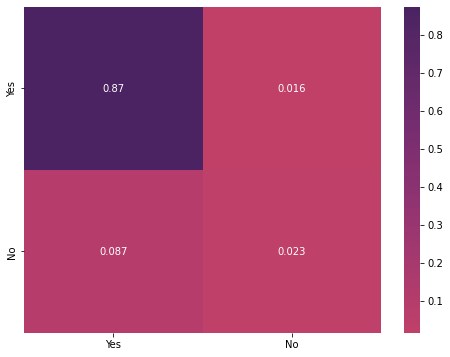

In [134]:
plot_confusion_matrix(y_test, y_pred, ticks=('Yes', 'No'))

## K-Nearest Neighbors (KNN)

Lakukan training untuk model KNN dengan dataset **X_train** dan **y_train** , lalu lakukan prediksi pada dataset **X_test** dengan model tersebut. Hasil prediksi kemudian dibandingkan dengan dataset **Y_test** untuk mengukur Accuracy dan F1 Score.

In [135]:
knn = KNeighborsClassifier(n_neighbors=32)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn_acc = accuracy_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)

print('Accuracy score of KNN: ', '{:.2f}%'.format(100* knn_acc))
print('F1 Score of KNN: ', '{:.2f}%'.format(100* knn_f1))

Accuracy score of KNN:  88.87%
F1 Score of KNN:  0.00%


Cek berbagai metrik performa dari prediksi model.

In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1151
           1       0.00      0.00      0.00       143

    accuracy                           0.89      1294
   macro avg       0.44      0.50      0.47      1294
weighted avg       0.79      0.89      0.84      1294



Cek performa dari prediksi model dengan plot confusion matrix.

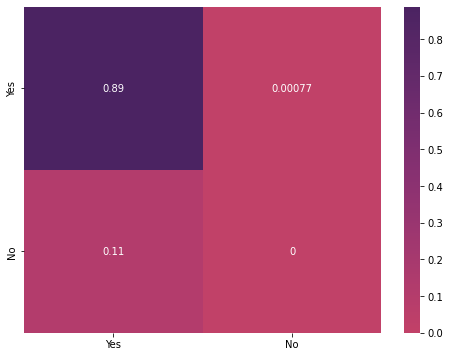

In [137]:
plot_confusion_matrix(y_test, y_pred, ticks=('Yes', 'No'))

## Support Vector Machine (SVM)

Lakukan training untuk model SVM dengan dataset **X_train** dan **y_train** , lalu lakukan prediksi pada dataset **X_test** dengan model tersebut. Hasil prediksi kemudian dibandingkan dengan dataset **Y_test** untuk mengukur Accuracy dan F1 Score.

In [138]:
svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

svm_acc = accuracy_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred)

print('Accuracy score of SVM: ', '{:.2f}%'.format(100* svm_acc))
print('F1 Score of SVM: ', '{:.2f}%'.format(100* svm_f1))

Accuracy score of SVM:  89.03%
F1 Score of SVM:  16.47%


Cek berbagai metrik performa dari prediksi model.

In [139]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1151
           1       0.52      0.10      0.16       143

    accuracy                           0.89      1294
   macro avg       0.71      0.54      0.55      1294
weighted avg       0.86      0.89      0.86      1294



Cek performa dari prediksi model dengan plot confusion matrix.

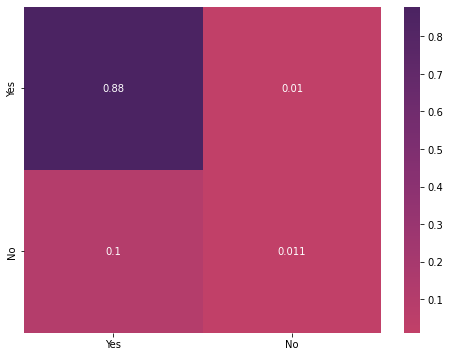

In [140]:
plot_confusion_matrix(y_test, y_pred, ticks=('Yes', 'No'))

## Naive Bayes

Lakukan training untuk model Naive Bayes dengan dataset **X_train** dan **y_train** , lalu lakukan prediksi pada dataset **X_test** dengan model tersebut. Hasil prediksi kemudian dibandingkan dengan dataset **Y_test** untuk mengukur Accuracy dan F1 Score.

In [141]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

nb_acc = accuracy_score(y_test, y_pred)
nb_f1 = f1_score(y_test, y_pred)

print('Accuracy score of Naive Bayes: ', '{:.2f}%'.format(100* nb_acc))
print('F1 Score of Naive Bayes: ', '{:.2f}%'.format(100* nb_f1))

Accuracy score of Naive Bayes:  84.00%
F1 Score of Naive Bayes:  36.70%


Cek berbagai metrik performa dari prediksi model.

In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1151
           1       0.33      0.42      0.37       143

    accuracy                           0.84      1294
   macro avg       0.63      0.66      0.64      1294
weighted avg       0.86      0.84      0.85      1294



Cek performa dari prediksi model dengan plot confusion matrix.

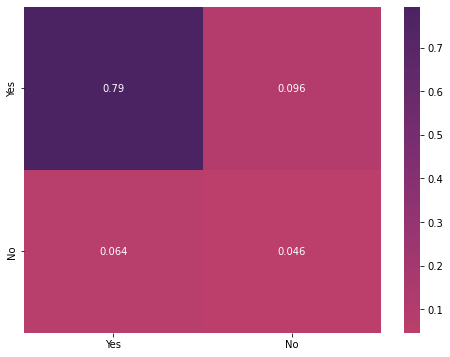

In [143]:
plot_confusion_matrix(y_test, y_pred, ticks=('Yes', 'No'))

## Decision Tree

Lakukan training untuk model Decision Tree dengan dataset **X_train** dan **y_train** , lalu lakukan prediksi pada dataset **X_test** dengan model tersebut. Hasil prediksi kemudian dibandingkan dengan dataset **Y_test** untuk mengukur Accuracy dan F1 Score.

In [144]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)

print('Accuracy score of Decision Tree: ', '{:.2f}%'.format(100* dt_acc))
print('F1 Score of Decision Tree: ', '{:.2f}%'.format(100* dt_f1))

Accuracy score of Decision Tree:  86.17%
F1 Score of Decision Tree:  36.75%


Cek berbagai metrik performa dari prediksi model.

In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1151
           1       0.37      0.36      0.37       143

    accuracy                           0.86      1294
   macro avg       0.65      0.64      0.64      1294
weighted avg       0.86      0.86      0.86      1294



Cek performa dari prediksi model dengan plot confusion matrix.

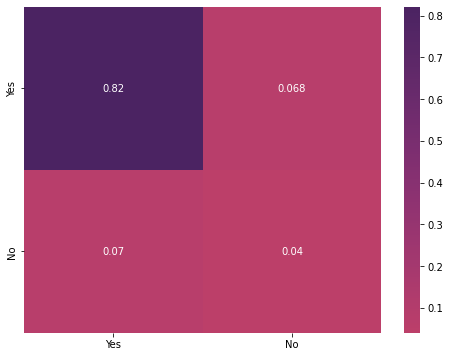

In [146]:
plot_confusion_matrix(y_test, y_pred, ticks=('Yes', 'No'))

## Random Forest

Lakukan training untuk model Random Forest dengan dataset **X_train** dan **y_train** , lalu lakukan prediksi pada dataset **X_test** dengan model tersebut. Hasil prediksi kemudian dibandingkan dengan dataset **Y_test** untuk mengukur Accuracy dan F1 Score.

In [147]:
rf = RandomForestClassifier(n_estimators=200, criterion='entropy')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

print('Accuracy score of Random Forest: ', '{:.2f}%'.format(100* rf_acc))
print('F1 Score of Random Forest: ', '{:.2f}%'.format(100* rf_f1))

Accuracy score of Random Forest:  88.79%
F1 Score of Random Forest:  25.64%


Cek berbagai metrik performa dari prediksi model.

In [148]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1151
           1       0.48      0.17      0.26       143

    accuracy                           0.89      1294
   macro avg       0.69      0.58      0.60      1294
weighted avg       0.86      0.89      0.86      1294



Cek performa dari prediksi model dengan plot confusion matrix.

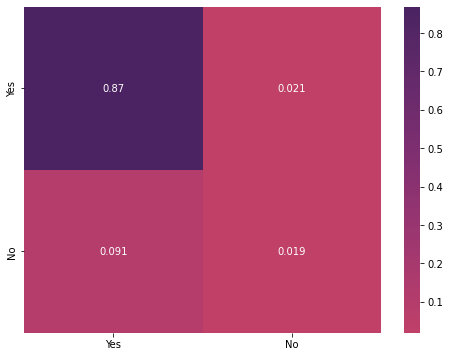

In [149]:
plot_confusion_matrix(y_test, y_pred, ticks=('Yes', 'No'))

# Model Evaluation and Selection

Bandingkan Accuracy dan F1 Score dari model-model tadi dengan bar plot.

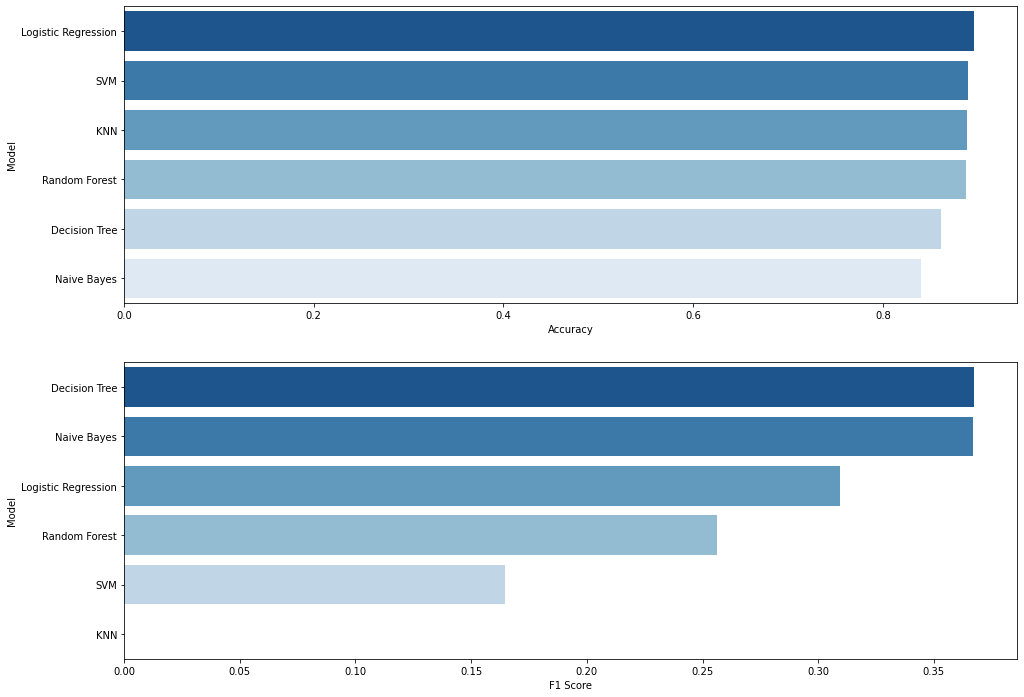

In [150]:
model_comparison_df = pd.DataFrame({'Model': ('Logistic Regression', 'KNN', 'SVM', 
                                              'Naive Bayes', 'Decision Tree', 'Random Forest',),
                                   'Accuracy': (lr_acc, knn_acc, svm_acc, 
                                                nb_acc, dt_acc, rf_acc),
                                   'F1 Score': (lr_f1, knn_f1, svm_f1, 
                                                nb_f1, dt_f1, rf_f1)})
metric_cols = ('Accuracy', 'F1 Score')

plt.figure(figsize=(16,12))
for i, col in enumerate(metric_cols, 1):
  plt.subplot(len(metric_cols), 1, i)
  sns.barplot(model_comparison_df.sort_values(col, ascending=False), x=col, y='Model', palette='Blues_r')
plt.show()

Karena data target imbalance (tidak seimbang), maka metrik yang cocok untuk membandingkan model satu dengan yang lain adalah F1 Score. Dengan demikian, model yang terbaik untuk dipilih adalah model Decision Tree karena memiliki F1 Score tertinggi.